Sucesso


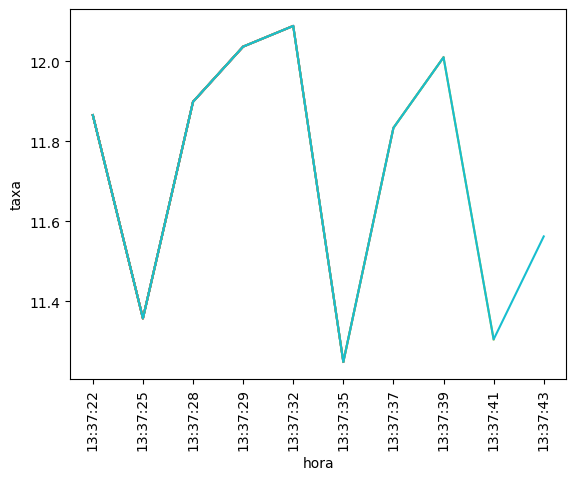

In [1]:
import os

import time

import json

from random import random

from datetime import datetime

import csv

from sys import argv

import pandas as pd

import seaborn as sns

import requests

import warnings

warnings.filterwarnings("ignore")

URL = 'https://www2.cetip.com.br/ConsultarTaxaDi/ConsultarTaxaDICetip.aspx'

# Criando a variável data e hora 

for _ in range(0, 10):

 data_e_hora = datetime.now()

 data = datetime.strftime(data_e_hora, '%Y/%m/%d')

 hora = datetime.strftime(data_e_hora, '%H:%M:%S')

 # Captando a taxa CDI do site da B3

 try:

  response = requests.get(URL)

  response.raise_for_status()

 except requests.HTTPError as exc:

  print("Dado não encontrado, continuando.")

  cdi = None

 except Exception as exc:

  print("Erro, parando a execução.")

  raise exc

 else:

  dado = json.loads(response.text)

  cdi = float(dado['taxa'].replace(',', '.')) + (random() - 0.5)

 # Verificando se o arquivo "taxa-cdi.csv" existe

 if os.path.exists('./taxa-cdi.csv') == False:

  with open(file='./taxa-cdi.csv', mode='w', encoding='utf8') as fp:

   fp.write('data,hora,taxa\n')

 # Salvando dados no arquivo "taxa-cdi.csv"

 with open(file='./taxa-cdi.csv', mode='a', encoding='utf8') as fp:

  fp.write(f'{data},{hora},{cdi}\n')

 time.sleep(2 + (random() - 0.5))

 #Lendo o CSV e gerando o Gráfico

 df = pd.read_csv('./taxa-cdi.csv')

# Salvando no grafico

 grafico = sns.lineplot(x=df['hora'], y=df['taxa'])

 _ = grafico.set_xticklabels(labels=df['hora'], rotation=90)

 #grafico.get_figure().savefig("grafico.png")

 grafico.get_figure().savefig(f"{argv[1]}.png")

print("Sucesso")